# Task 1

Derive the discrete process model $ x_t = F \cdot x_{t-1} + G \cdot u_t + Q $ from the continuous-time system $ \dot{x}(t) = A \cdot x(t) + B \cdot u(t) + N(t) $, assuming constant acceleration model.

Where matrix A is,
\begin{equation}
A = \begin{bmatrix}
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
\end{equation}
Matrix B is,
\begin{equation}
    B = \begin{bmatrix}
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0  \\
1 & 0 & 0  \\
0 & 1 & 0 \\
0 & 0 & 1  \\
\end{bmatrix}
\end{equation}
General Solution of $ \dot{x}(t) = A \cdot x(t) + B \cdot u(t) $ is, $x(t+\Delta t) = e^{A\Delta t}x(t) + \int_{0}^{\Delta t} e^{At}dt B u(t) $

Where $F = e^{A\Delta t}$ and $ G = \int_{0}^{\Delta t} e^{At}B$

Solving for F and G,
\begin{equation}
    F = e^{A\Delta t} = I + A\Delta t + \frac{(A\Delta t)^2}{2!} + \frac{(A\Delta t)^3}{3!} + \frac{(A\Delta t)^4}{4!} + \ldots
\end{equation}
Here $A^2 = 0$ and subsequently all H.O.T are $0$.

Therefore,
\begin{equation}
    F = e^{A\Delta t} = I + A\Delta t
\end{equation}

\begin{equation}
  F = \begin{bmatrix}
    1 & 0 & 0 & \Delta t & 0 & 0 \\
    0 & 1 & 0 & 0 & \Delta t & 0 \\
    0 & 0 & 1 & 0 & 0 & \Delta t \\
    0 & 0 & 0 & 1 & 0 & 0 \\
    0 & 0 & 0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 \\
  \end{bmatrix}
\end{equation}

\begin{equation}
    G = \int_{0}^{\Delta t} e^{At} dt B = \left[ tI + \frac{At^2}{2} \right]_{0}^{\Delta t} B= \left(\Delta tI + A\left(\frac{\Delta t^2}{2}\right)\right) B
\end{equation}

\begin{equation}
  G = \begin{bmatrix}
    \Delta t & 0 & 0 & \frac{\Delta t^2}{2} & 0 & 0 \\
    0 & \Delta t & 0 & 0 & \frac{\Delta t^2}{2} & 0 \\
    0 & 0 & \Delta t & 0 & 0 & \frac{\Delta t^2}{2} \\
    0 & 0 & 0 & \Delta t & 0 & 0 \\
    0 & 0 & 0 & 0 & \Delta t & 0 \\
    0 & 0 & 0 & 0 & 0 & \Delta t
  \end{bmatrix}
  \begin{bmatrix}
    0 & 0 & 0 \\
    0 & 0 & 0 \\
    0 & 0 & 0 \\
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1
  \end{bmatrix}
\end{equation}

\begin{equation}
    G = \begin{bmatrix}
 \frac{\Delta t^2}{2} & 0 & 0 \\
 0 & \frac{\Delta t^2}{2} & 0 \\
  0 & 0 & \frac{\Delta t^2}{2} \\
 \Delta t & 0 & 0 \\
 0 & \Delta t & 0 \\
 0 & 0 & \Delta t 
\end{bmatrix}
\end{equation}
As the input provided is Force, $F = m\ddot{p}$, G updates to,
\begin{equation}
    G = m * \begin{bmatrix}
 \frac{\Delta t^2}{2} & 0 & 0 \\
 0 & \frac{\Delta t^2}{2} & 0 \\
  0 & 0 & \frac{\Delta t^2}{2} \\
 \Delta t & 0 & 0 \\
 0 & \Delta t & 0 \\
 0 & 0 & \Delta t 
\end{bmatrix}
\end{equation}
The first three rows of G correspond to how the accelerations affect the change in position ($\frac{1}{2}at^2$). The last three rows correspond to how the accelerations affect the change in velocity (v = at).

The process noise covariance matrix \( Q \) represents the covariance of the process noise affecting the system.
\begin{equation}
     Q = \text{diag}(\sigma_p^2, \sigma_p^2, \sigma_p^2, \sigma_v^2, \sigma_v^2, \sigma_v^2) 
\end{equation}

## Kalman Filter
### Prediction Step:
Use the process model to predict the next state estimate $\hat{x}_{k+1|k}$ and the error covariance matrix $P_{k+1|k}$ based on the previous state estimate $\hat{x}_k$ and the control input $u_k$. The prediction equations are:
\begin{align*}
    \hat{x}_{k+1|k} & = F \hat{x}_k + G u_k \\
    P_{k+1|k} & = F P_k F^T + Q
\end{align*}

### Update Step:
Compute the Kalman gain $K$ and update the state estimate $\hat{x}_{k+1}$ and the error covariance matrix $P_{k+1}$. The update equations are:
\begin{align*}
    K & = P_{k+1|k} H^T (H P_{k+1|k} H^T + R)^{-1} \\
    \hat{x}_{k+1} & = \hat{x}_{k+1|k} + K(z_{k+1} - H \hat{x}_{k+1|k}) \\
    P_{k+1} & = (I - K H) P_{k+1|k}
\end{align*}

# Task 2

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def load_data(filename):
    '''
    Function to read the data from the .txt file
    Input: filename
    Output:
        t: Time values
        u: Input force
        z: Measurements
    '''
    # Read data from the CSV/TXT file
    data = np.loadtxt(filename, delimiter=',')
    # Extract time, force, and measurement values
    t = data[:, 0]
    u = data[:, 1:4]
    z = data[:, 4:7]

    return t, u, z

In [3]:
def compute_system_mtx(dt):
    """
    Function to compute State Transition Matrix (F) and Control Input Matrix (G)
    Input: 
        dt: Time step
    Output:
        F: State Transition Matrix
        G: Control Input Matrix
    """
    F = np.array([[1, 0, 0, dt, 0, 0],
                  [0, 1, 0, 0, dt, 0],
                  [0, 0, 1, 0, 0, dt],
                  [0, 0, 0, 1, 0, 0],
                  [0, 0, 0, 0, 1, 0],
                  [0, 0, 0, 0, 0, 1]])
    G = np.array([[dt**2/2, 0, 0],
                [0, dt**2/2, 0],
                [0, 0, dt**2/2],
                [dt, 0, 0],
                [0, dt, 0],
                [0, 0, dt]])
    return F, G

In [4]:
def kalman_filter(t, u, z, H, R, Q, P0, param):
    '''
    Function to implement Kalman Filter
    Inputs:
        t: Time Values
        u: Input Force
        z: Measurements (Position/Velocity)
        H: Measurement Matrix
        R: Measurement noise covariance
        Q: Process noise covariance
        P0: Initial error covariance
        param: Type of Measurements (Position/Velocity)
    Ouput:
        xhat: Predicted States
    '''
    n = len(t)
    m = 0.027                # Mass of Drone
    xhat = np.zeros((n, 6))  # Initialize state vector
    P = np.zeros((n, 6, 6))  # Process Covariance matrix
    I = np.eye(6)

    # Initialization
    if param == 'pos':
        xhat[0] = np.concatenate([z[0],np.zeros(3)])    # Initial State
    elif param == 'vel':
        xhat[0] = np.concatenate([np.zeros(3),z[0]])

    P[0] = P0
    
    for k in range(1, n):
        ####### Prediction step #############
        dt = t[k] - t[k-1]                             # Get time step

        # Compute F and G
        F, G = compute_system_mtx(dt)            # Compute State Transition Matrix and Control Input Matrix
        
        xhat_pred = F @ xhat[k-1] + G @ u[k-1] * m     # Predict state
        P_pred = F @ P[k-1] @ F.T + Q                  # Predict uncertainity
       
        #### Update step #######
        # Compute Kalman Gain
        S = H @ P_pred @ H.T + R
        K = P_pred @ H.T @ np.linalg.inv(S)
        
        y = z[k] - H @ xhat_pred
        xhat[k] = xhat_pred + K @ y    # Update State with measurement
        P[k] = (I - K @ H) @ P_pred    # Update estimate uncertainity

    return xhat, P


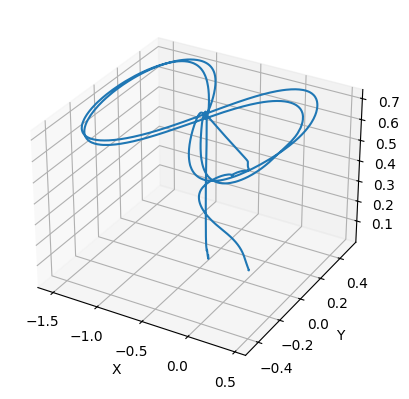

In [5]:
## Kalman filter for mocap data

t, u, z = load_data("kalman_filter_data_mocap.txt") 
H = np.array([[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0]])   # H for position updates
R = np.eye(3) * (0.5)**2        # Measurement noise covariance 
Q = np.eye(6) * (0.01) ** 2     # Process noise covariance
P0 = np.diag([0.01, 0.01, 0.01, 0.05, 0.05, 0.05])  # Initial Error Covariance

xhat, P = kalman_filter(t, u, z, H, R, Q, P0, 'pos')

# Extract estimated positions from xhat
p_hat = xhat[:, :3]

# 3D plot using Matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(p_hat[:, 0], p_hat[:, 1], p_hat[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

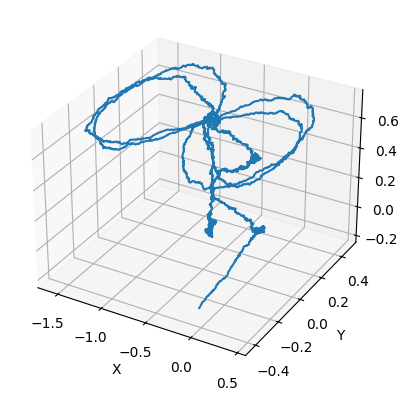

In [6]:
# Kalman filter for high noise data

file_path = 'kalman_filter_data_high_noise.txt'
t, u, z = load_data(file_path)  
H = np.array([[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0]]) 
Q = np.eye(6) * (0.008) ** 2     # Process noise covariance
R = np.eye(3) * (1)**2           # Measurement noise covariance 
P0 = np.diag([0.01, 0.01, 0.01, 0.05, 0.05, 0.05])  # Initial Error Covariance

xhat, P = kalman_filter(t, u, z, H, R, Q, P0, 'pos')

# Extract estimated positions from xhat
p_hat = xhat[:, :3]

# Create plot using Matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(p_hat[:, 0], p_hat[:, 1], p_hat[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


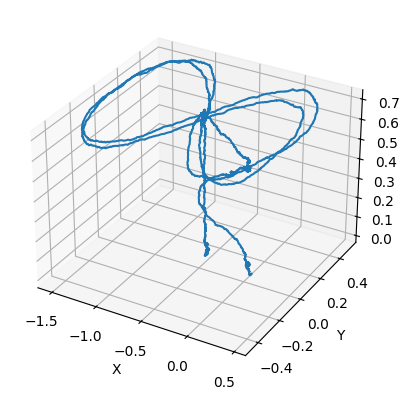

In [7]:
# Kalman filter for low noise data

file_path = 'kalman_filter_data_low_noise.txt'
t, u, z = load_data(file_path)  
H = np.array([[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0]]) 
Q = np.eye(6) * (0.01) ** 2     # Process noise covariance
R = np.eye(3) * (0.5)**2        # Measurement noise covariance 
P0 = np.diag([0.01, 0.01, 0.01, 0.05, 0.05, 0.05])  # Initial Error Covariance

xhat, P = kalman_filter(t, u, z, H, R, Q, P0, 'pos')

# Extract estimated positions from xhat
p_hat = xhat[1:, :3]

# 3D plot using Matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(p_hat[:, 0], p_hat[:, 1], p_hat[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

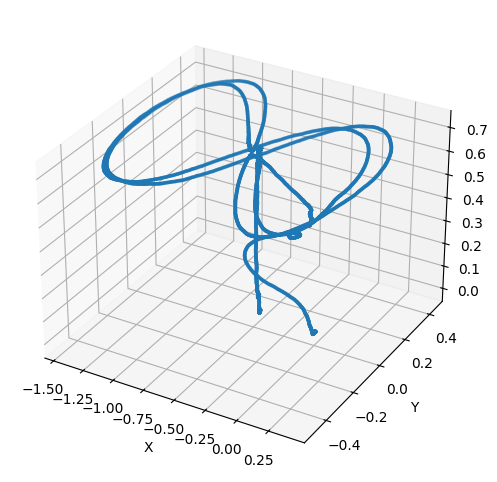

In [8]:
# Kalman Filter for velocity data

file_path = 'kalman_filter_data_velocity.txt'
t, u, z = load_data(file_path)  # Replace with the actual filename
H = np.array([[0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]]) 
Q = np.eye(6) * (0.01) ** 2     # Process noise covariance
R = np.eye(3) * (0.1)**2        # Measurement noise covariance 
P0 = np.diag([0.01, 0.01, 0.01, 0.05, 0.05, 0.05])  # Initial Error Covariance
xhat, P = kalman_filter(t, u, z, H, R, Q, P0, 'vel')

# Extract estimated positions from xhat
p_hat = xhat[:, :3]

# Create a 3D plot using Matplotlib
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection="3d")
ax.scatter3D(p_hat[:, 0], p_hat[:, 1], p_hat[:, 2], s=3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
